In [24]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from pathlib import Path
import warnings
import os
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm
from PIL import Image
import random
import pandas as pd
import numpy as np
from collections import defaultdict
import cv2

warnings.simplefilter('ignore')
pd.options.display.precision = 3

In [3]:
df_train = pd.read_csv("../raw/train-metadata.csv")
df_train.head()

isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type  tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white    20.244  ...   
1                    1.10  TBP tile: close-up     3D: white    31.713  ...   
2                    3.40  TBP tile: close-up        3D: XP    22.576  ...   
3                    3.22  TBP tile: close-up        3D: XP    14.242  ...   
4                    2.73  TBP tile: close-up     3D: white    24.726  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx_5  \
0         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
1  IL_6727506     Benign  Benign     NaN     NaN     NaN     NaN   
2         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
3         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
4         NaN     Benign  Benign     NaN     NaN     NaN     NaN   

   mel_mitotic_index  mel_thick_mm  tbp_lv_dnn_lesion_confidence  
0                NaN           NaN                        97.517  
1                NaN           NaN                         3.141  
2                NaN           NaN                        99.804  
3                NaN           NaN                        99.990  
4                NaN           NaN                        70.443  

[5 rows x 55 columns]

In [22]:
TRAIN_DIR = '../raw/train-image/image'

def get_train_file_path(image_id):
    return f"{TRAIN_DIR}/{image_id}.jpg"

In [45]:
print("陽性の数:", (df_train["target"]==1).sum())

陽性の数: 393


# Negative

In [40]:
df_negative = df_train[df_train["target"] == 0]
df_negative["iddx_full"].value_counts().sort_index().iloc[:15]

iddx_full
Benign                                                                                         399991
Benign::Benign adnexal epithelial proliferations - Apocrine or Eccrine::Hidradenoma                 1
Benign::Benign adnexal epithelial proliferations - Follicular                                       2
Benign::Benign epidermal proliferations::Lichen planus like keratosis                              11
Benign::Benign epidermal proliferations::Pigmented benign keratosis                                 3
Benign::Benign epidermal proliferations::Seborrheic keratosis                                      56
Benign::Benign epidermal proliferations::Seborrheic keratosis::Seborrheic keratosis, Clonal         1
Benign::Benign epidermal proliferations::Solar lentigo                                             12
Benign::Benign melanocytic proliferations::Nevus                                                  141
Benign::Benign melanocytic proliferations::Nevus::Blue nevus::Blue nevus

In [41]:
df_negative["iddx_full"].value_counts().sort_index().iloc[15:]

iddx_full
Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Dermal                                              20
Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Junctional                                          10
Benign::Benign melanocytic proliferations::Nevus::Nevus, Of special anatomic site                                  2
Benign::Benign melanocytic proliferations::Nevus::Nevus, Spitz                                                     3
Benign::Benign soft tissue proliferations - Fibro-histiocytic::Angiofibroma::Angiofibroma, Facial                  2
Benign::Benign soft tissue proliferations - Fibro-histiocytic::Dermatofibroma                                     11
Benign::Benign soft tissue proliferations - Fibro-histiocytic::Fibroepithelial polyp                               1
Benign::Benign soft tissue proliferations - Fibro-histiocytic::Scar                                                1
Benign::Benign soft tissue proliferations - Vascular::

In [13]:
len(df_negative["iddx_full"].value_counts())

32

In [46]:
print("Benign以外の数:", (df_negative["iddx_full"]!="Benign").sum())

Benign以外の数: 675


Benign::Benign adnexal epithelial proliferations - Apocrine or Eccrine::Hidradenoma
count: 1


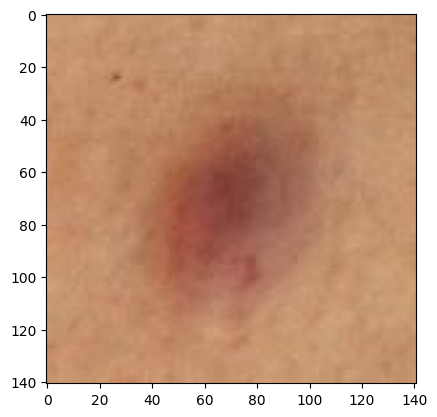

Benign::Benign adnexal epithelial proliferations - Follicular
count: 2


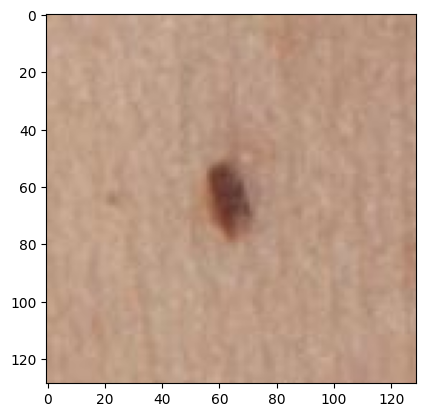

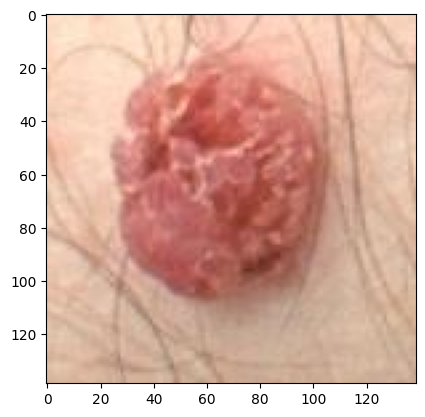

Benign::Benign epidermal proliferations::Lichen planus like keratosis
count: 11


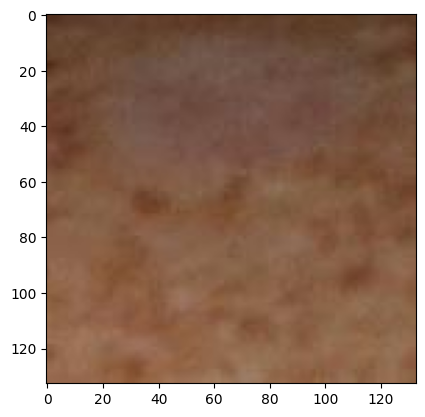

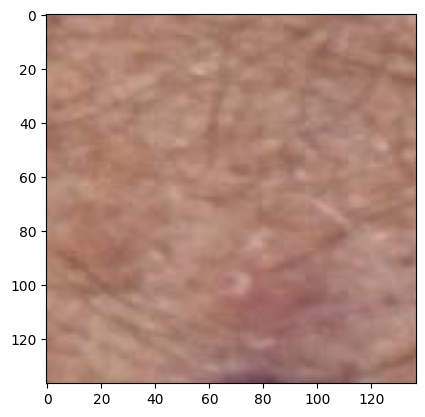

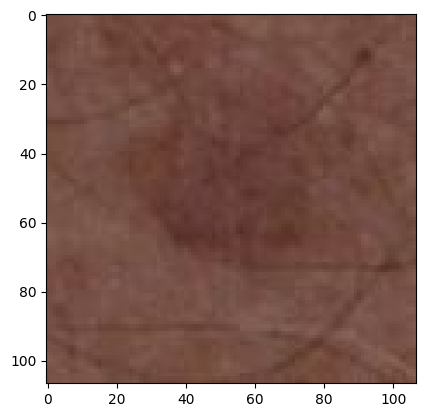

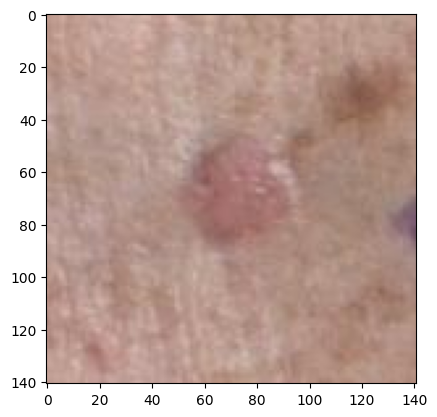

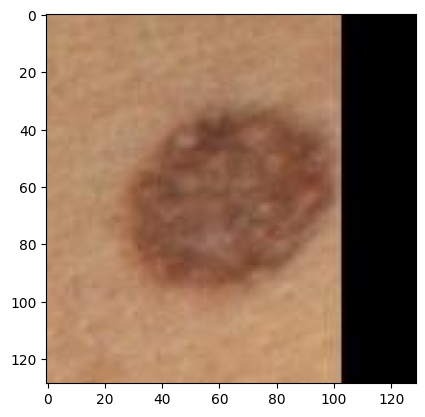

Benign::Benign epidermal proliferations::Pigmented benign keratosis
count: 3


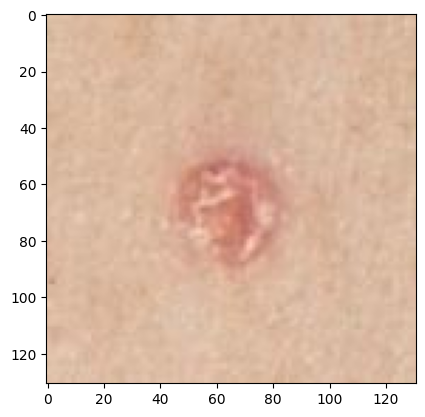

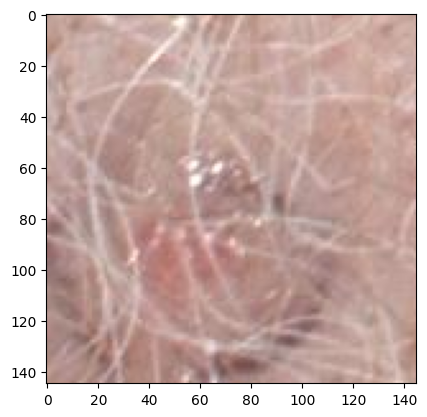

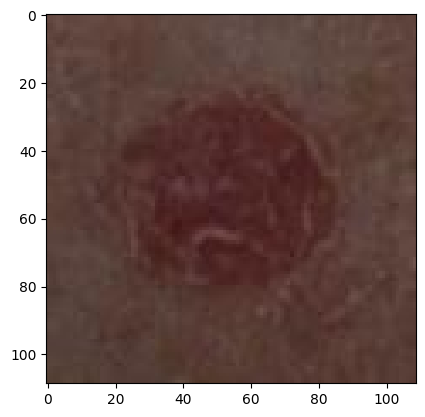

In [26]:
for iddx in sorted(df_negative["iddx_full"].unique().tolist())[:5]:
    if iddx == "Benign":
        continue
    tmp = df_negative[df_negative["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()


Benign::Benign epidermal proliferations::Seborrheic keratosis
count: 56


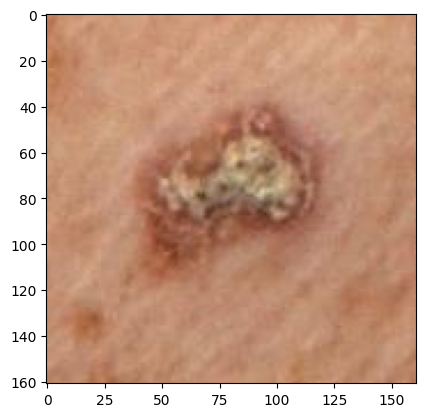

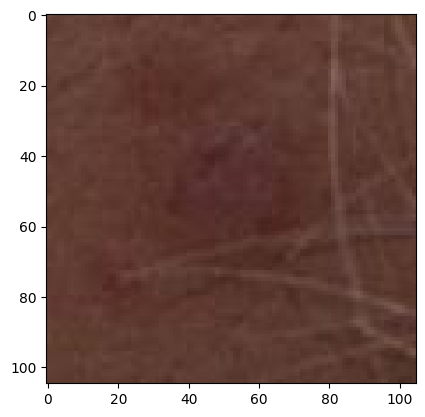

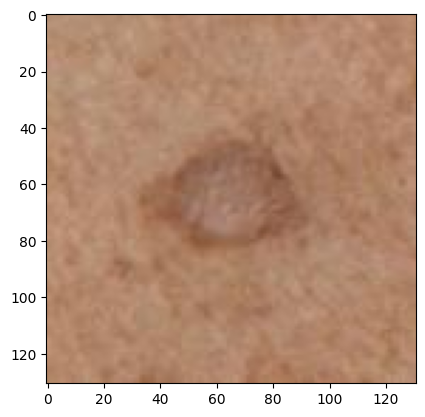

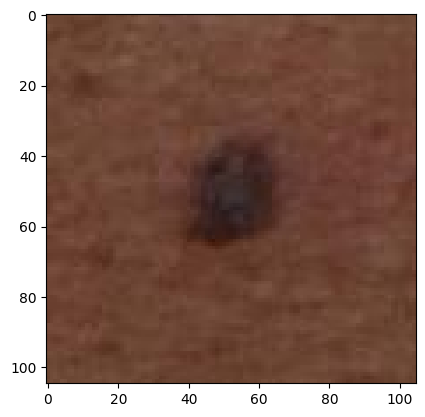

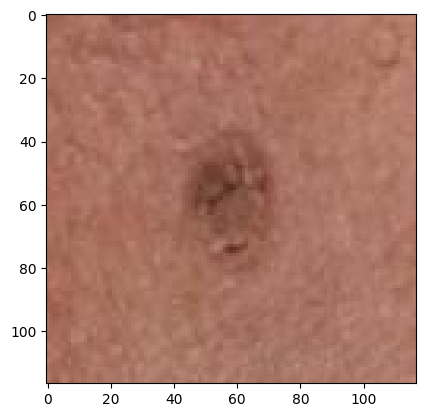

Benign::Benign epidermal proliferations::Seborrheic keratosis::Seborrheic keratosis, Clonal
count: 1


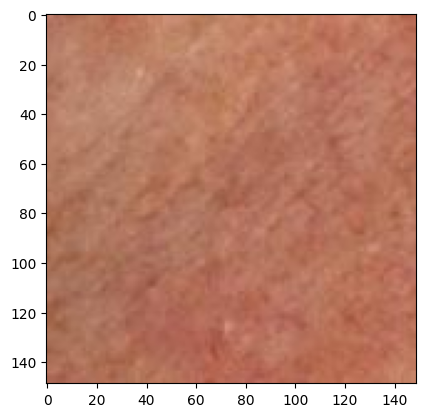

Benign::Benign epidermal proliferations::Solar lentigo
count: 12


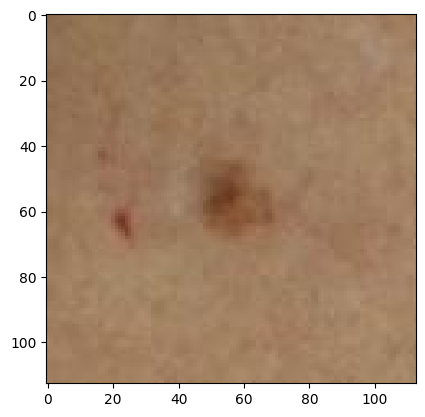

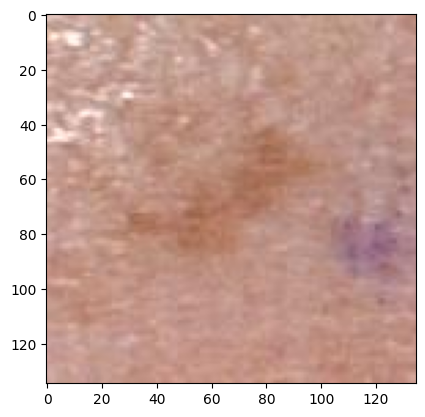

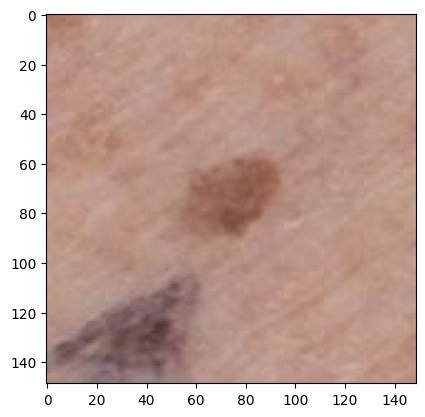

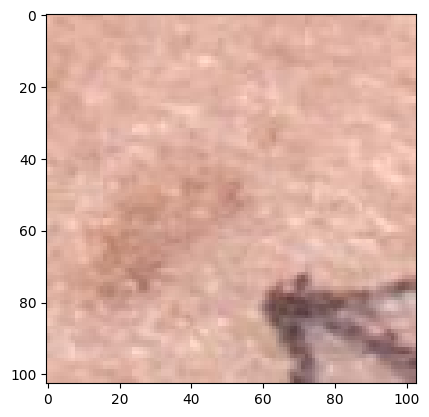

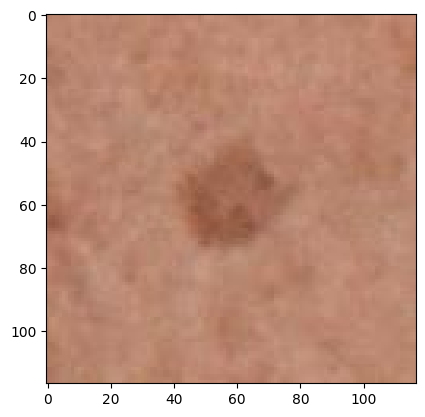

Benign::Benign melanocytic proliferations::Nevus
count: 141


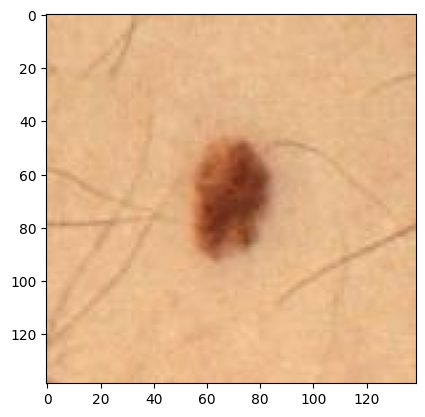

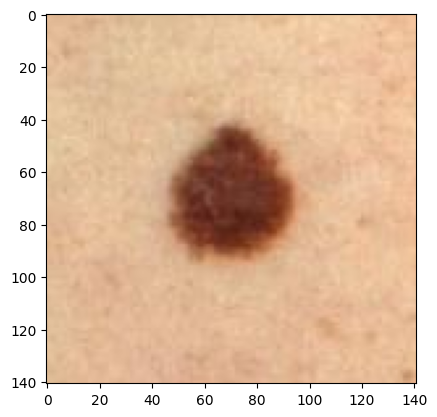

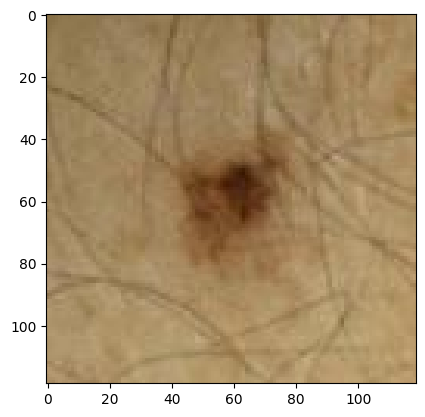

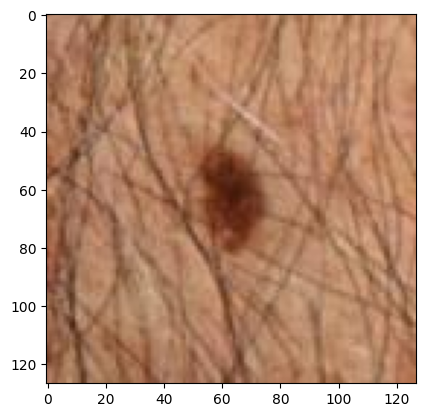

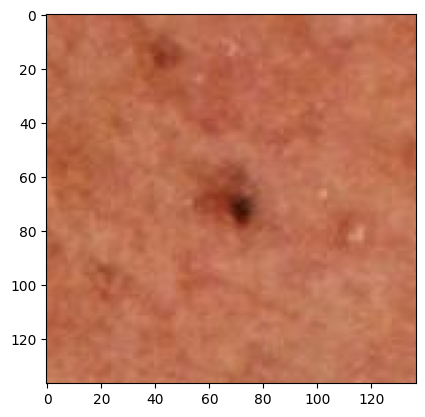

Benign::Benign melanocytic proliferations::Nevus::Blue nevus::Blue nevus, Cellular
count: 1


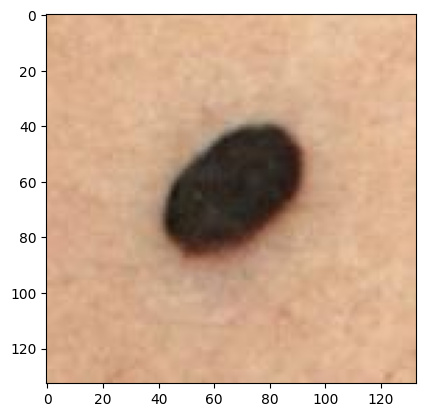

In [27]:
for iddx in sorted(df_negative["iddx_full"].unique().tolist())[5:10]:
    if iddx == "Benign":
        continue
    tmp = df_negative[df_negative["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()

Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark
count: 228


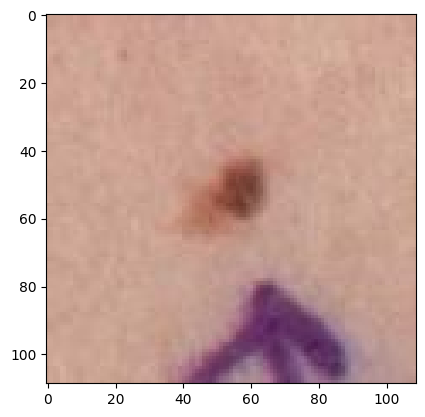

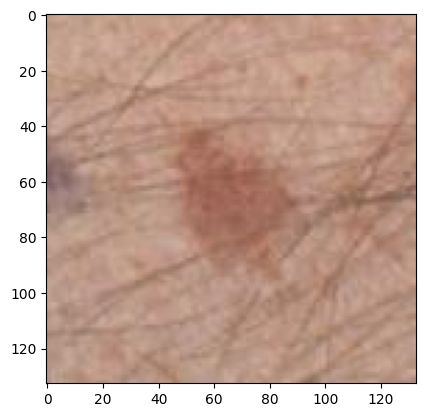

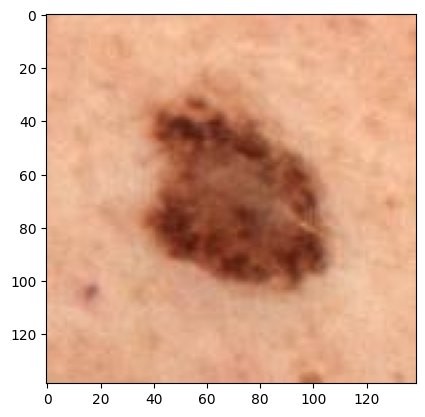

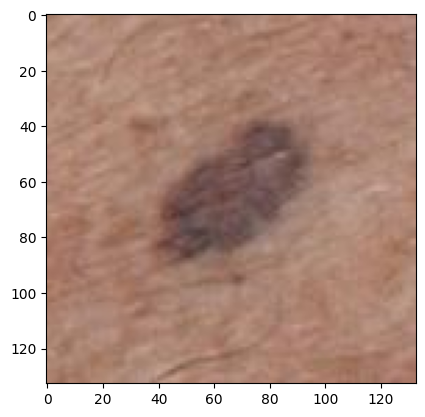

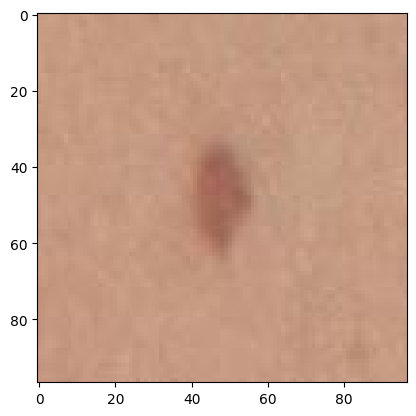

Benign::Benign melanocytic proliferations::Nevus::Nevus, Combined
count: 2


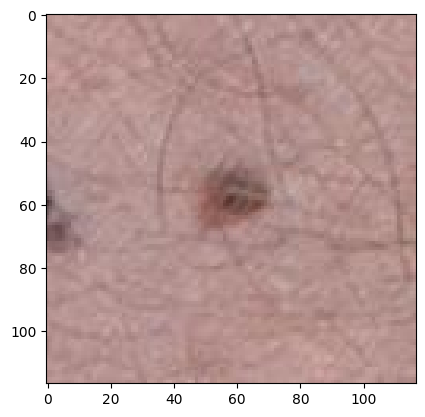

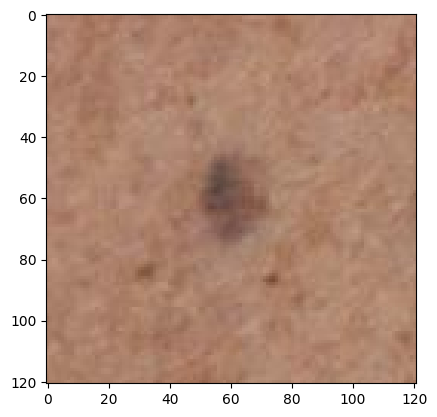

Benign::Benign melanocytic proliferations::Nevus::Nevus, Congenital
count: 4


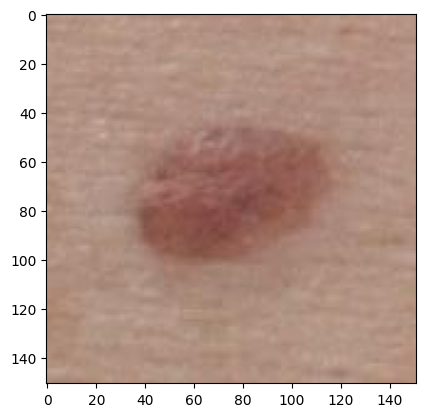

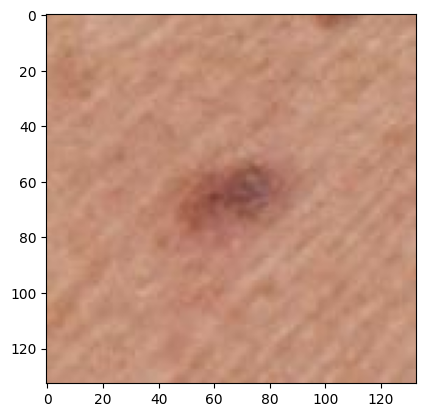

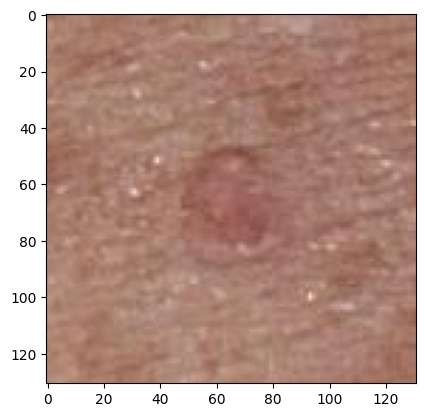

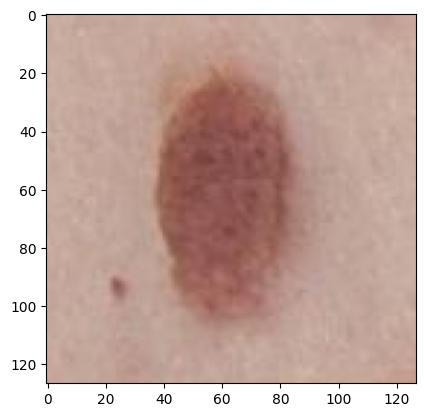

Benign::Benign melanocytic proliferations::Nevus::Nevus, Deep penetrating
count: 2


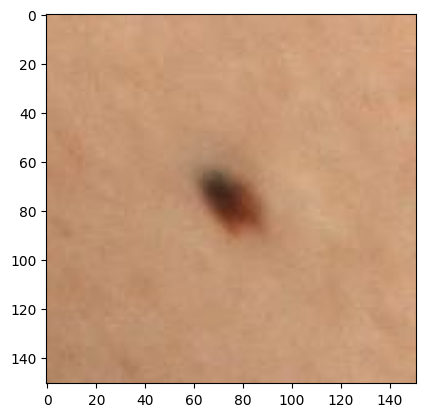

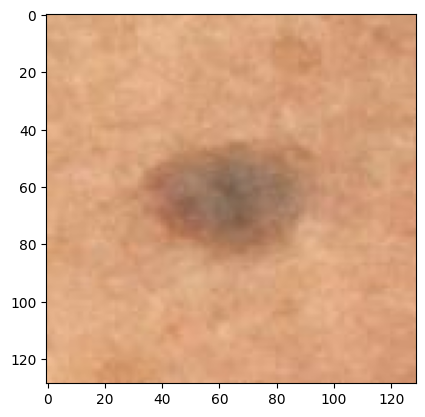

Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Compound
count: 30


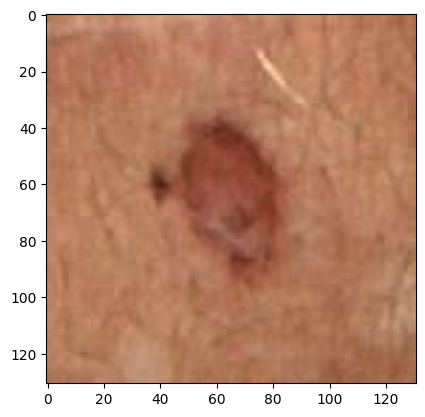

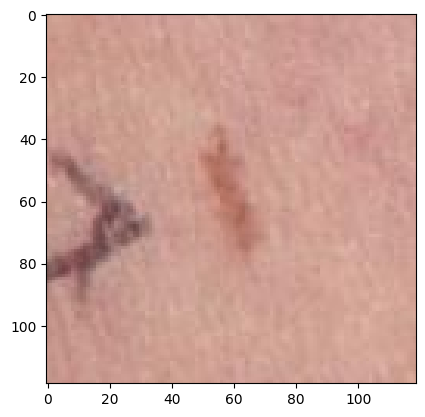

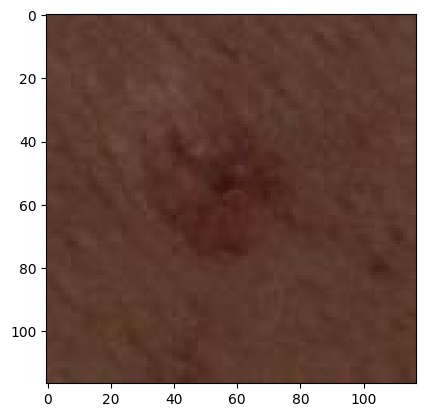

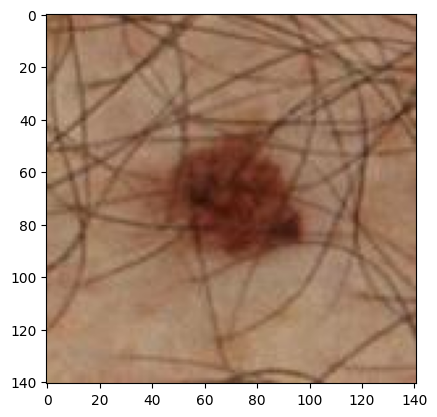

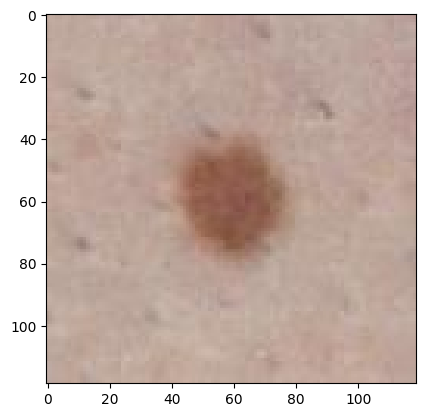

In [28]:
for iddx in sorted(df_negative["iddx_full"].unique().tolist())[10:15]:
    if iddx == "Benign":
        continue
    tmp = df_negative[df_negative["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()

Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Dermal
count: 20


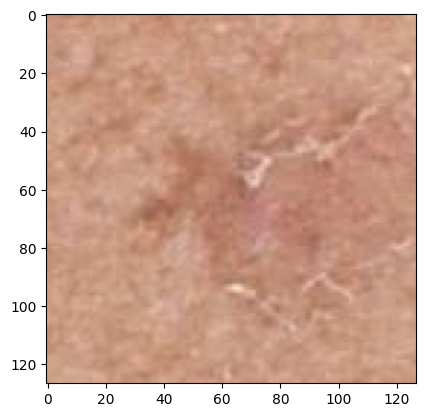

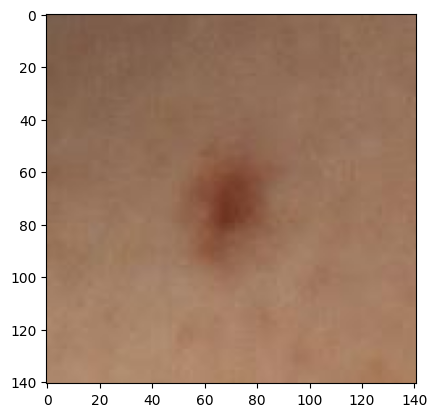

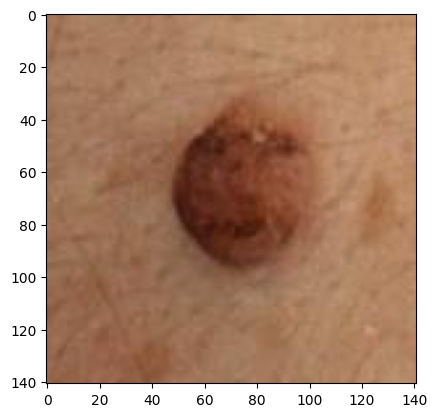

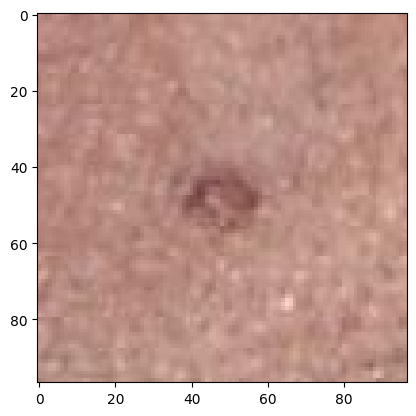

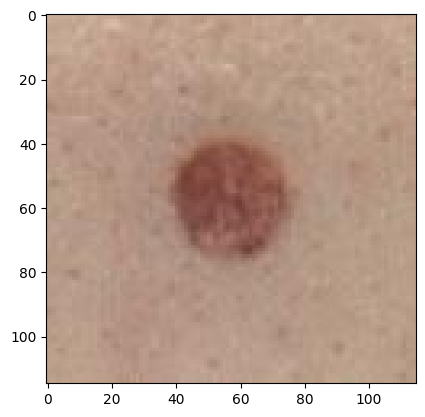

Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Junctional
count: 10


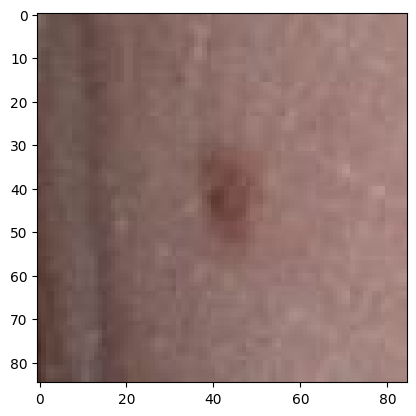

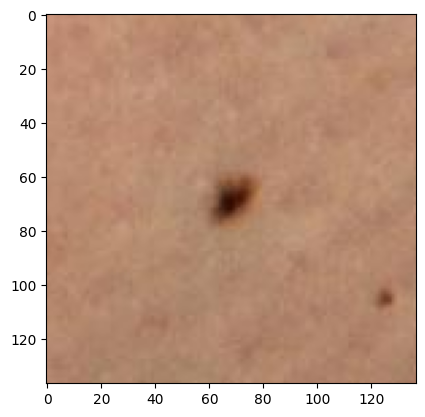

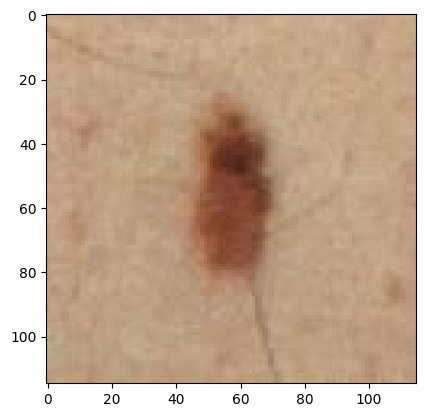

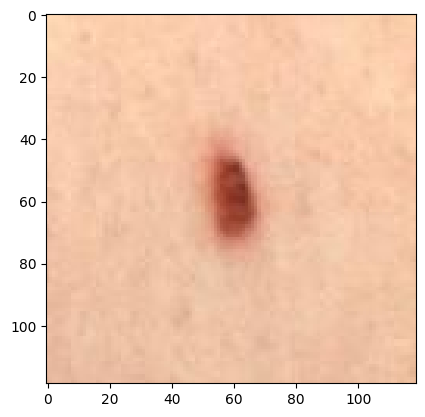

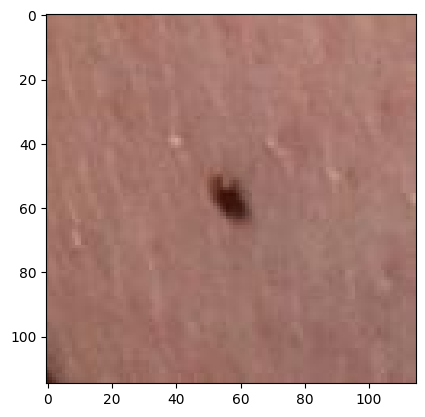

Benign::Benign melanocytic proliferations::Nevus::Nevus, Of special anatomic site
count: 2


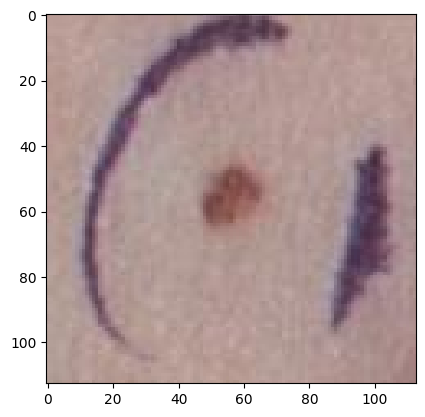

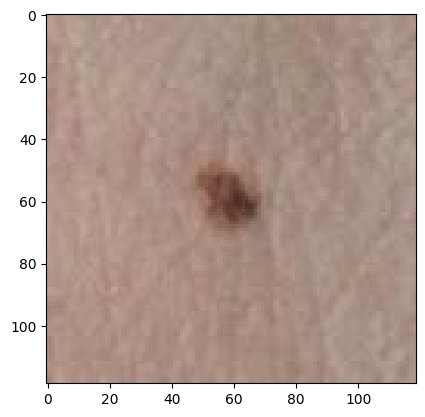

Benign::Benign melanocytic proliferations::Nevus::Nevus, Spitz
count: 3


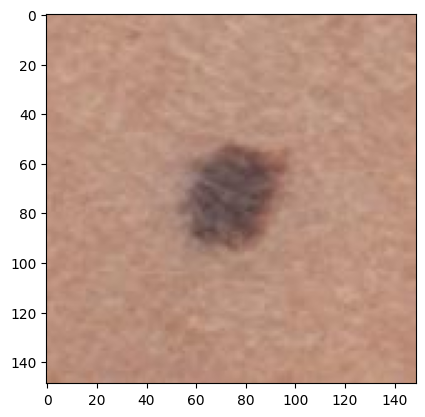

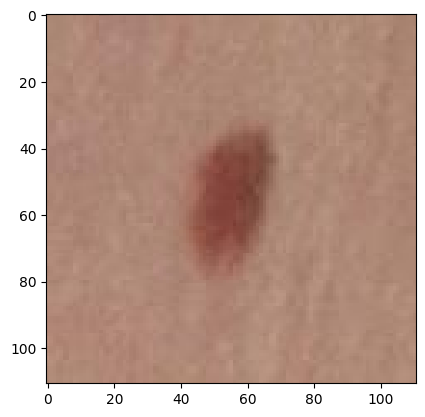

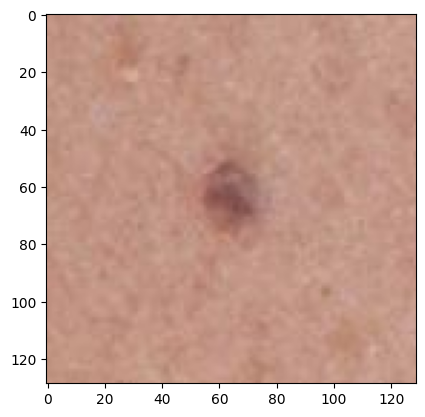

Benign::Benign soft tissue proliferations - Fibro-histiocytic::Angiofibroma::Angiofibroma, Facial
count: 2


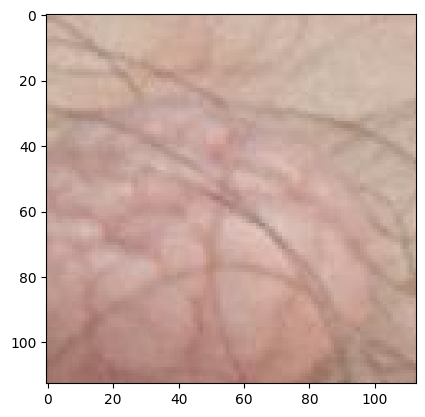

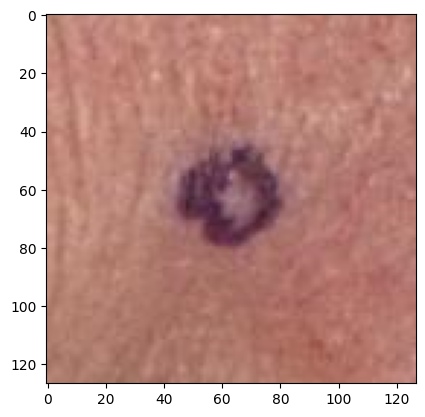

In [29]:
for iddx in sorted(df_negative["iddx_full"].unique().tolist())[15:20]:
    if iddx == "Benign":
        continue
    tmp = df_negative[df_negative["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()

Benign::Benign soft tissue proliferations - Fibro-histiocytic::Dermatofibroma
count: 11


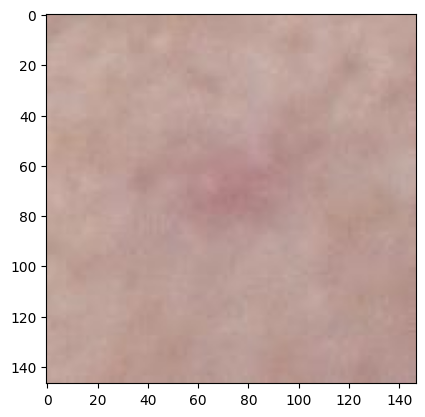

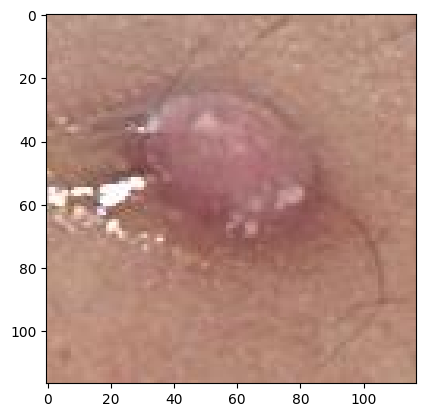

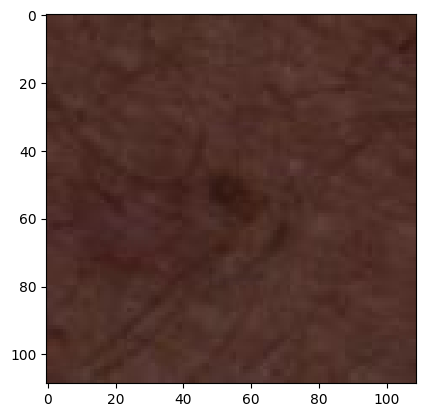

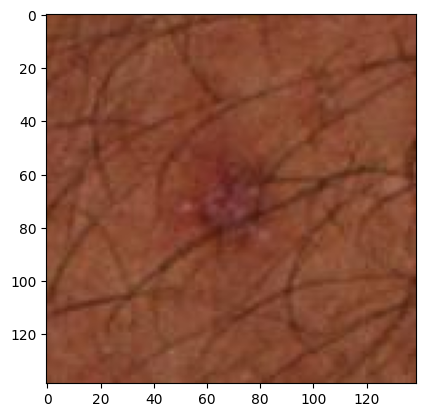

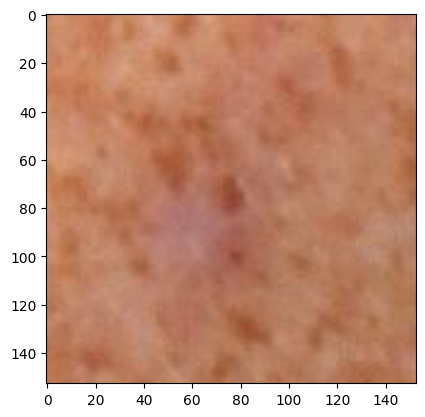

Benign::Benign soft tissue proliferations - Fibro-histiocytic::Fibroepithelial polyp
count: 1


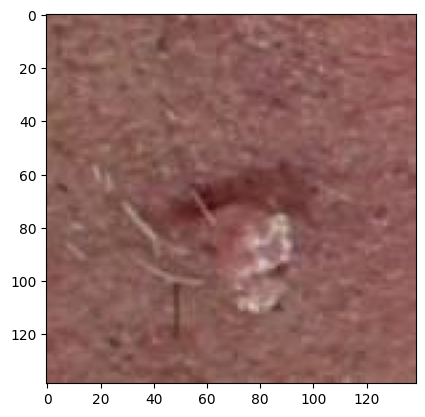

Benign::Benign soft tissue proliferations - Fibro-histiocytic::Scar
count: 1


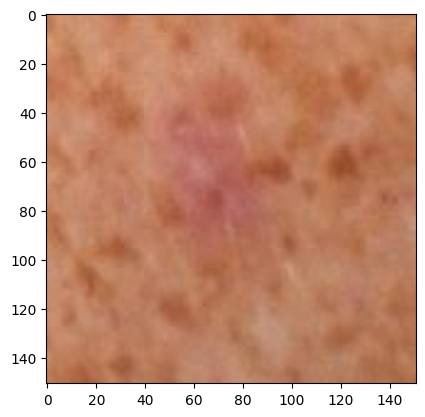

Benign::Benign soft tissue proliferations - Vascular::Hemangioma::Hemangioma, Cherry
count: 3


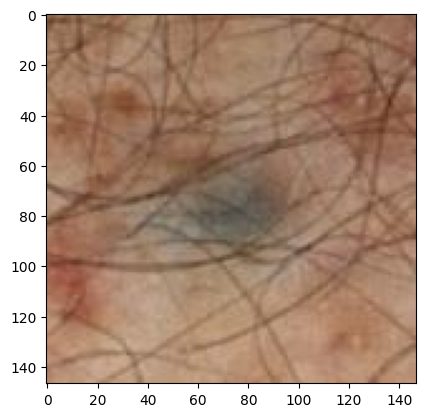

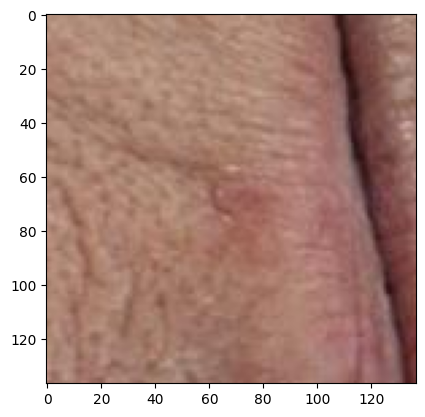

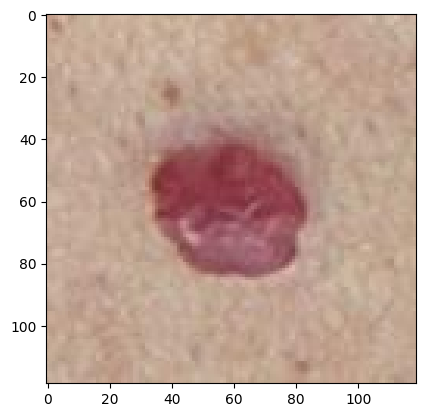

Benign::Cysts
count: 1


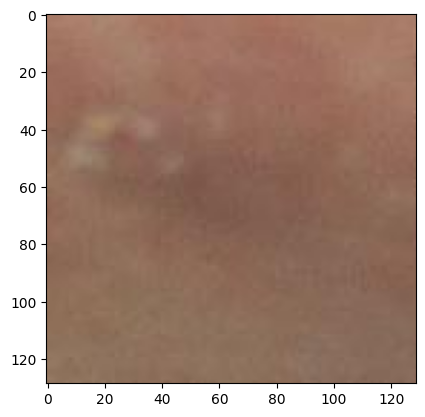

In [30]:
for iddx in sorted(df_negative["iddx_full"].unique().tolist())[20:25]:
    if iddx == "Benign":
        continue
    tmp = df_negative[df_negative["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()

Benign::Cysts::Trichilemmal or isthmic-catagen or pilar cyst
count: 1


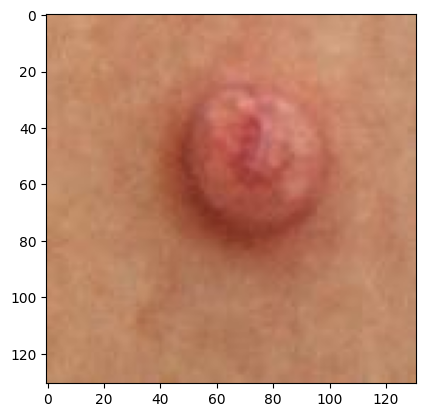

Benign::Flat melanotic pigmentations - not melanocytic nevus::Lentigo NOS
count: 5


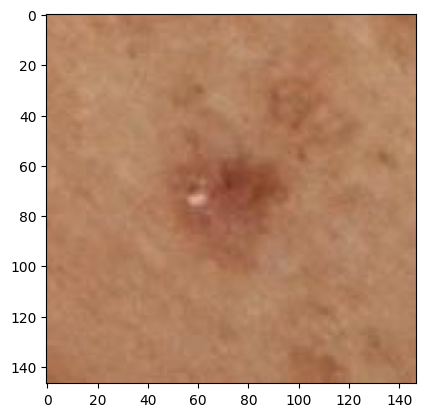

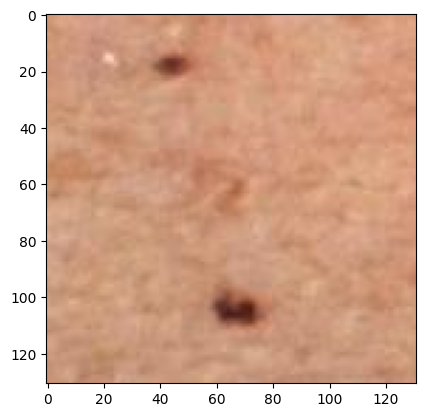

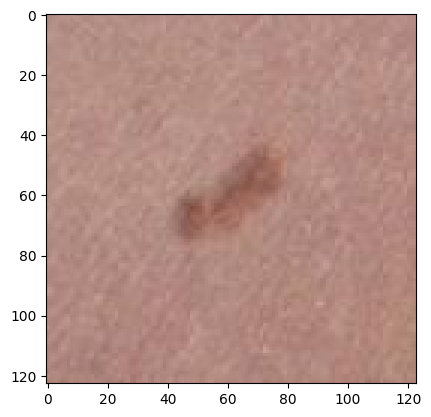

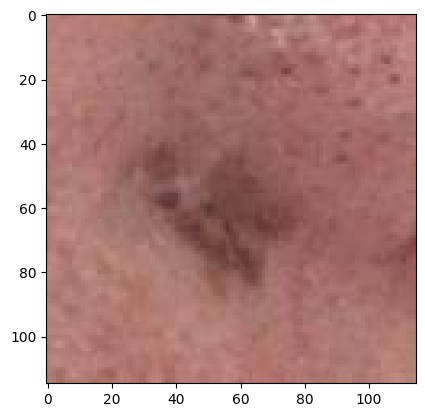

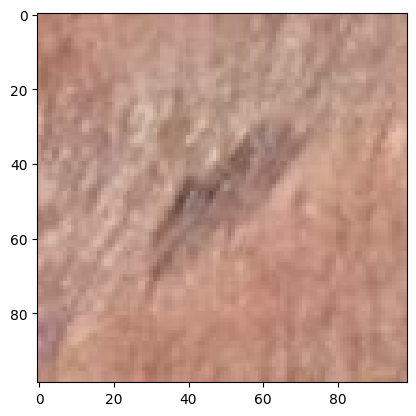

Benign::Inflammatory or infectious diseases::Verruca
count: 7


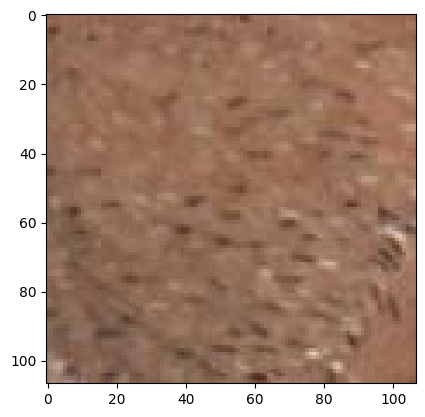

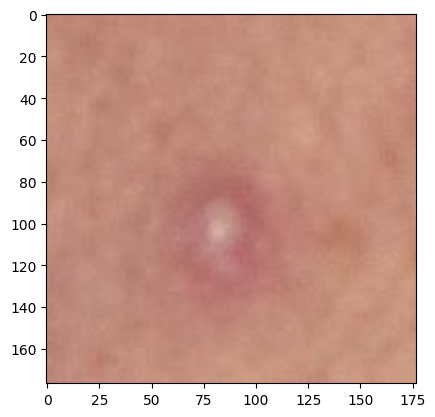

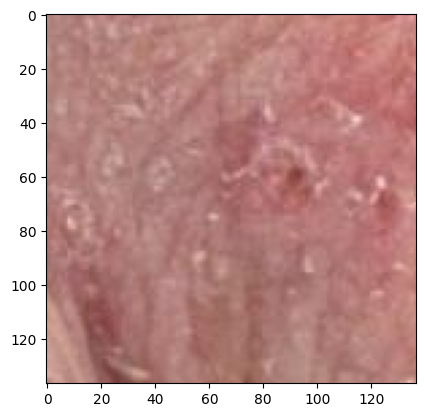

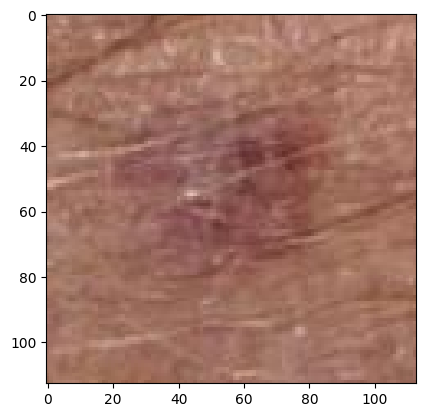

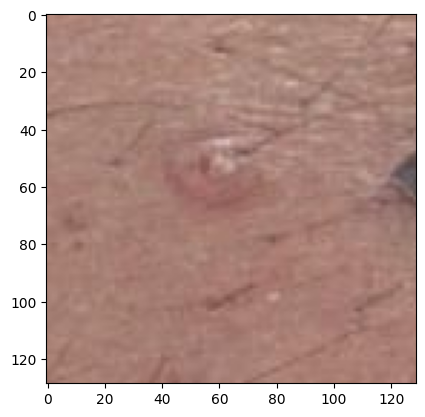

Indeterminate::Indeterminate epidermal proliferations::Solar or actinic keratosis
count: 38


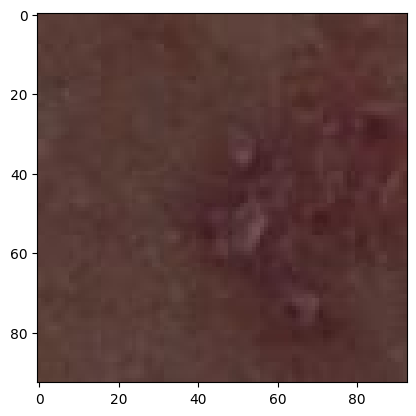

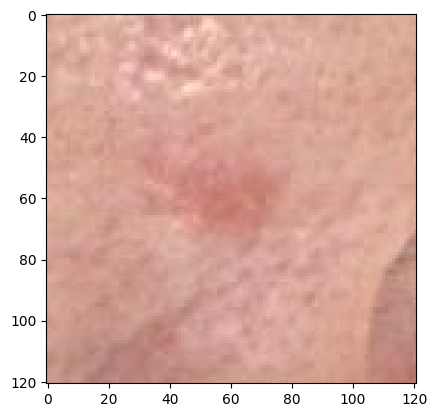

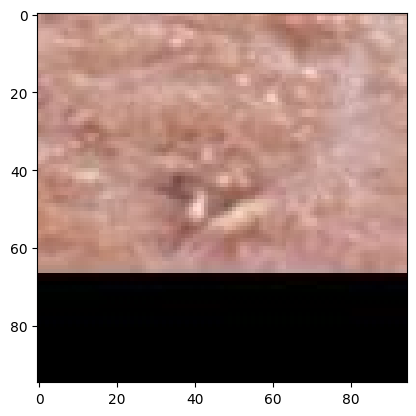

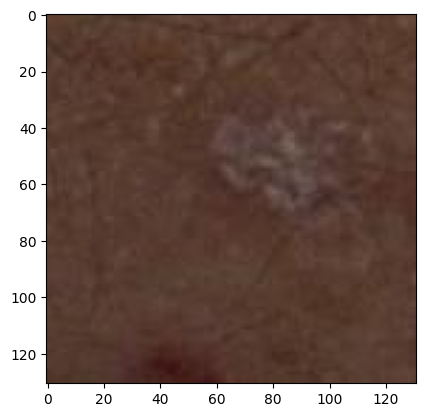

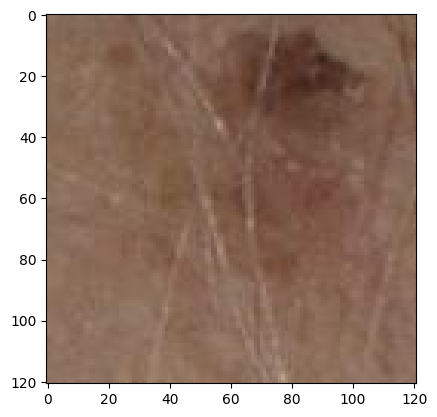

Indeterminate::Indeterminate epidermal proliferations::Solar or actinic keratosis::Actinic keratosis, Bowenoid
count: 1


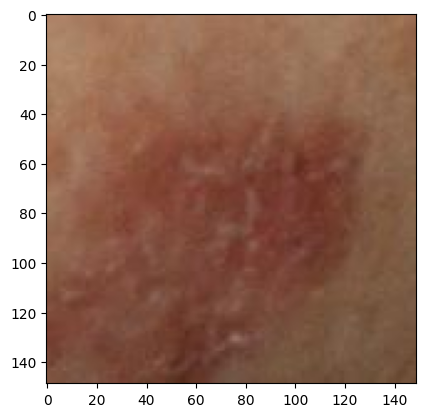

In [31]:
for iddx in sorted(df_negative["iddx_full"].unique().tolist())[25:30]:
    if iddx == "Benign":
        continue
    tmp = df_negative[df_negative["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()

Indeterminate::Indeterminate melanocytic proliferations::Atypical intraepithelial melanocytic proliferation
count: 11


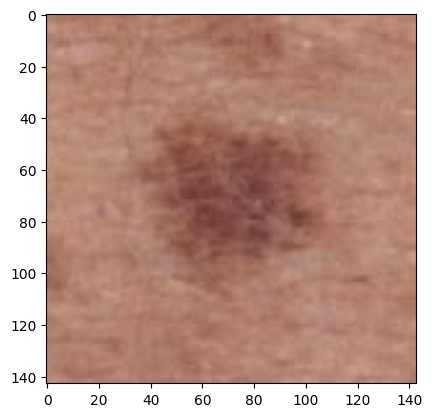

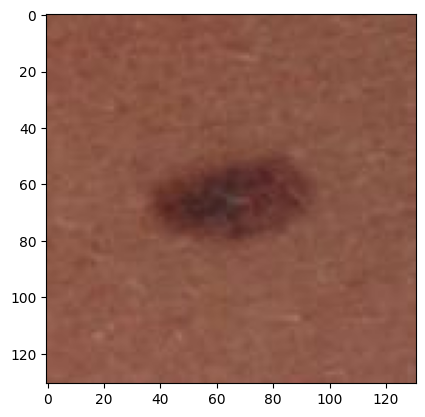

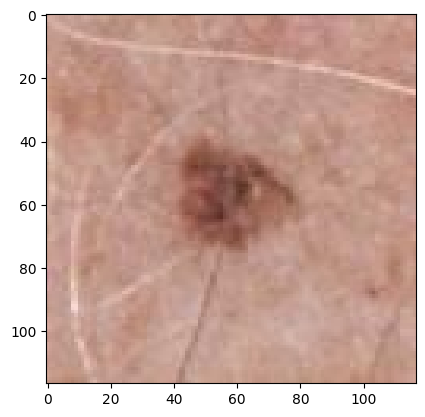

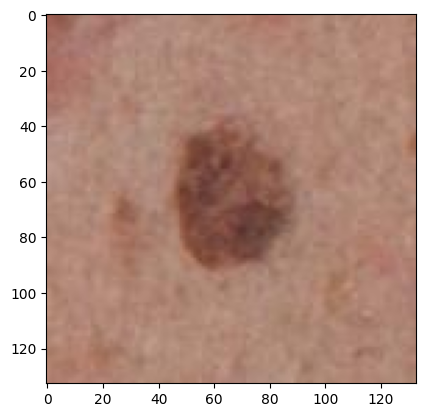

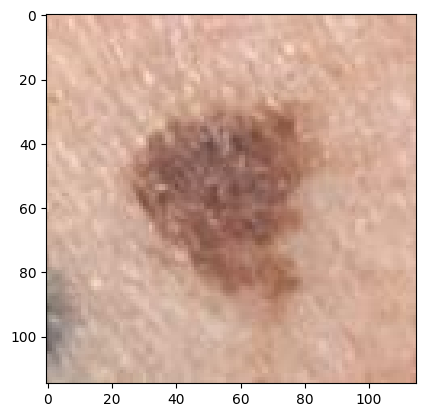

Indeterminate::Indeterminate melanocytic proliferations::Atypical melanocytic neoplasm
count: 64


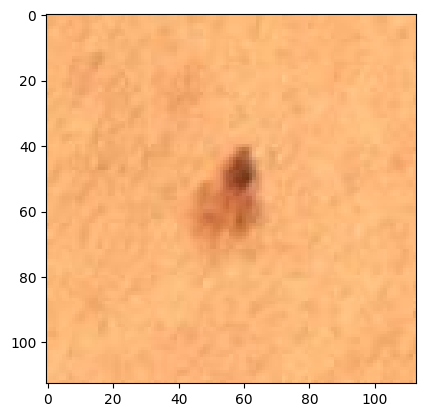

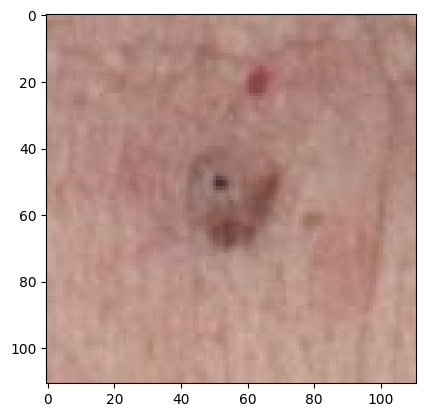

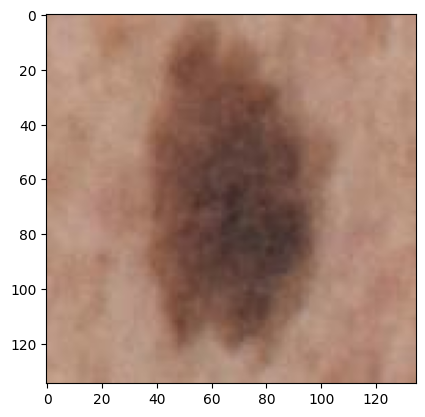

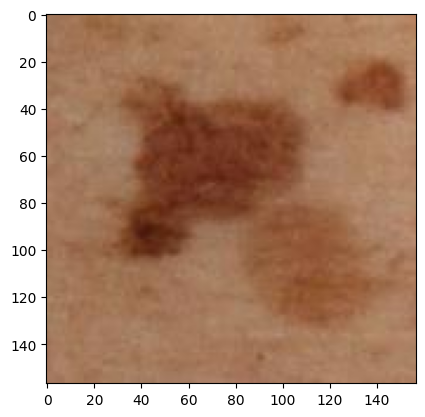

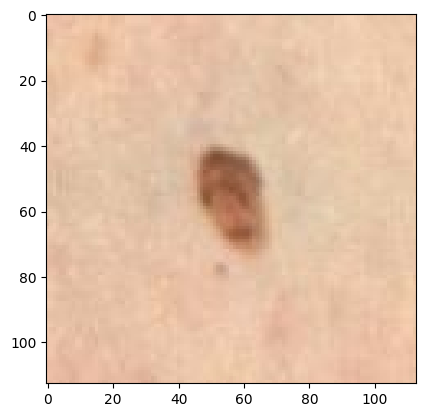

In [32]:
for iddx in sorted(df_negative["iddx_full"].unique().tolist())[30:]:
    if iddx == "Benign":
        continue
    tmp = df_negative[df_negative["iddx_full"] == iddx]
    print("==="*20)
    print(iddx)
    print("count:", len(tmp))
    if len(tmp) > 5:
        image_id_list = tmp.sample(5)["isic_id"].values
    else:
        image_id_list = tmp["isic_id"].values
    for image_id in image_id_list:
        image_path = get_train_file_path(image_id)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()